Kaggle notebook reference: [click here](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook)

In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
cars = pd.read_csv('car-price-dataset/car-price.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Based on 01-titanic-dataset-prediction, some to-dos that can be created:
1. Identifying numerical continuous columns
2. Identifying numerical discrete columns
3. Identifying categorial columns
4. Finding columns with missing or null values
5. Identifying which columns might not have too strong correlation with the prediction (price).
6. Grouping by columns to find more patterns, and correlation between 2 columns and their correlation with price.
7. Extracting useful value from a column, while getting rid of remaining value from it.
8. Replacing not-so-frequent values from columns, with a common value.
9. Filling missing or null values.
10. Creating bands of values wherever applicable
11. Adding features made up of other features combined.
12. Training the model and then using it for prediction. 

Some useful methods to use
1. To find if the column contains any na value
```python
train_df[column].isna().any()
```
2. To find if the column contains any null value
```python
train_df[column].isnull().any()
```
3. To find datatypes of columns, to be used while conversion
```python
train_df.info()
```
4. To see how many value of a type exist in a columns
```python
train_df['Age'].value_counts()
```
5. To find percentage of values from (4)
```python
train_df['Parch'].value_counts(normalize=True) * 100
```
6. Using multiple column conditions to find out no. of values
```python
train_df[((train_df["Parch"] > 0) & (train_df["SibSp"] > 0))].shape[0]/train_df.shape[0])
```
7. To describe a specific set of columns
```python
train_df.describe(include=['O'])
```
8. To find out how many na (similarity for null) in a column
```python
train_df["Cabin"].isna().value_counts()
```
9. To group by on a column and correlate with the prediction column
```python
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)
```
10. Using visualization to view more such patterns
```python
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20) # relation of age with survived
plt.show()
```
11. Creating combination of columns with target column to view such patterns
```python
import seaborn as sns
import matplotlib.pyplot as plt
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()
```
12. Creating combination of columns with target column to view such patterns - 2
```python
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()
```



In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Data Cleaning and preparation

In [7]:
# getting company name from car name
cars["CarName"] = cars["CarName"].apply(lambda x: x.split(" ")[0])

In [9]:
cars.rename(columns={"CarName": "CompanyName"}, inplace=True)

In [20]:
# seeing all possible values
cars.sort_values(by="CompanyName").CompanyName.unique()

array(['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

In [22]:
# replacing same but incorrect spelling values with correct one
cars.CompanyName.replace('maxda','mazda', inplace=True)
cars.CompanyName.replace('porcshce','porsche', inplace=True)
cars.CompanyName.replace('toyouta','toyota', inplace=True)
cars.CompanyName.replace('vokswagen','volkswagen', inplace=True)
cars.CompanyName.replace('vw','volkswagen', inplace=True)

In [24]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

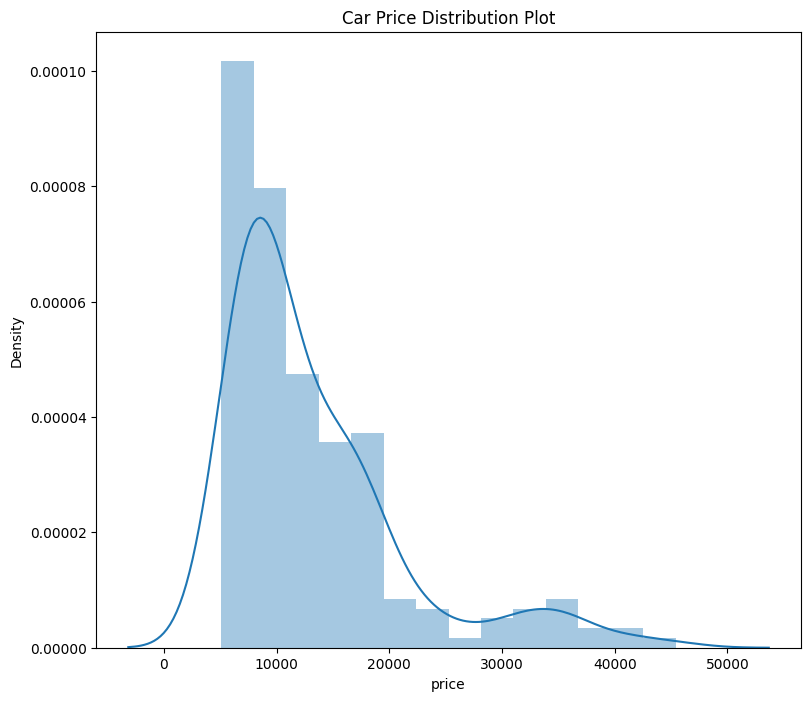

In [27]:
# visualizing column data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

Above chart means the values are a bit skewed towards 5-10k price